# Data Cleaning

<br>

### Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from etswatch.eutl import accounts

import FEAutils as hlp

In [2]:
installation_dfs = accounts.get_installation_dfs(data_dir='../data/installations')

df_installation_emissions = installation_dfs['verified_emissions']

df_installation_emissions.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
account_id,,,,,,,,,,,,,,,,,,,,,
100000,87923,106745,117404,126296,105795,105034,101784,21384,5671,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,134139,138143,170415,143182,149405,142121,119263,102751,101881,99012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,0,NaN,NaN,NaN,Not Reported,Not Reported,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0,NaN,NaN,NaN,Not Reported,Not Reported,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0,NaN,NaN,NaN,Not Reported,Not Reported,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#exports
def count_non_numeric_vals(df):
    cols = df.columns
    s_non_numeric_value_counts = pd.Series(dtype='float64')

    for col in cols:
        s = df.loc[:, col]
        s_non_numeric = ~(pd.to_numeric(s, errors='coerce').notnull() | s.isnull())
        s_non_numeric_value_counts = s_non_numeric_value_counts.append(s[s_non_numeric].value_counts())

    s_non_numeric_value_counts = s_non_numeric_value_counts.groupby(s_non_numeric_value_counts.index).sum()

    return s_non_numeric_value_counts

In [4]:
count_non_numeric_vals(df_installation_emissions)

Excluded        3486
Not Reported    3097
dtype: int64

In [5]:
numeric_ts_dfs = ['allocated_allowances', 'units_surrendered', 'verified_emissions']
non_numeric_value_counts = dict()

for numeric_ts_df in numeric_ts_dfs:
    df = installation_dfs[numeric_ts_df]
    s_non_numeric_value_counts = count_non_numeric_vals(df)
    non_numeric_value_counts[numeric_ts_df] = s_non_numeric_value_counts

    print(f'{numeric_ts_df} has {s_non_numeric_value_counts.size} unique non-numeric values')

allocated_allowances has 7964 unique non-numeric values
units_surrendered has 0 unique non-numeric values
verified_emissions has 2 unique non-numeric values


In [6]:
df_installation_emissions = (df_installation_emissions
                             .replace('Excluded', np.nan)
                             .replace('Not Reported', np.nan)
                             .astype(float))

assert (df_installation_emissions<0).sum().sum() == 0, 'Negative emissions are present'

df_installation_emissions.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
account_id,,,,,,,,,,,,,,,,,,,,,
100000,87923.0,106745.0,117404.0,126296.0,105795.0,105034.0,101784.0,21384.0,5671.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,134139.0,138143.0,170415.0,143182.0,149405.0,142121.0,119263.0,102751.0,101881.0,99012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_allowances = installation_dfs['allocated_allowances']
s_non_numeric_value_counts = non_numeric_value_counts['allocated_allowances']

pd.Series(s_non_numeric_value_counts.index).replace('  *****', '')

0           0  10014  *****
1            0  1002  *****
2           0  10023  *****
3           0  10024  *****
4           0  10028  *****
               ...         
7959    99737  36982  *****
7960    99738  345220  ****
7961    99769  221555  ****
7962    99828  33530  *****
7963     99888  28630  ****
Length: 7964, dtype: object

<br>

### Verified Emissions Analysis

Text(0, 0.5, 'CO$_{2}$ Emissions (Tonnes)')

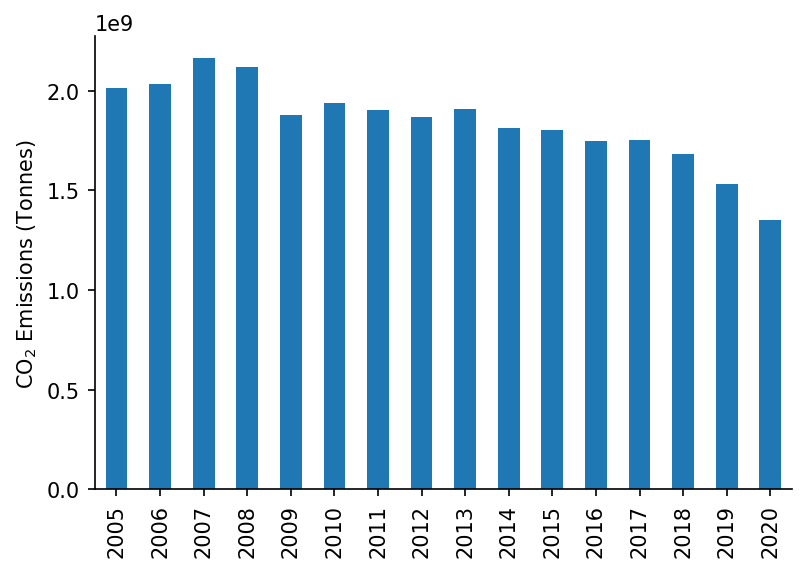

In [36]:
fig, ax = plt.subplots(dpi=150)

df_installation_emissions.sum().replace(0, np.nan).dropna().plot.bar(ax=ax)

hlp.hide_spines(ax)
ax.set_ylabel('CO$_{2}$ Emissions (Tonnes)')

<AxesSubplot:ylabel='Count'>

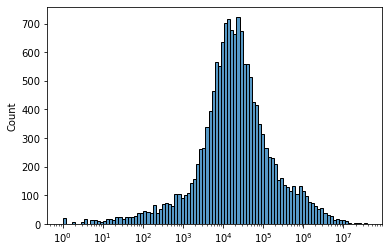

In [8]:
s_emissions = df_installation_emissions.max(axis=1).replace(0, np.nan).dropna()

sns.histplot(s_emissions, log_scale=True)

In [ ]:
# should bucket average emissions and then compare reductions in each bucket

In [ ]:
# should repeat the heatmap for just GB power stations

Text(0.5, 1.0, 'Verified Emissions of EU ETS Installations')

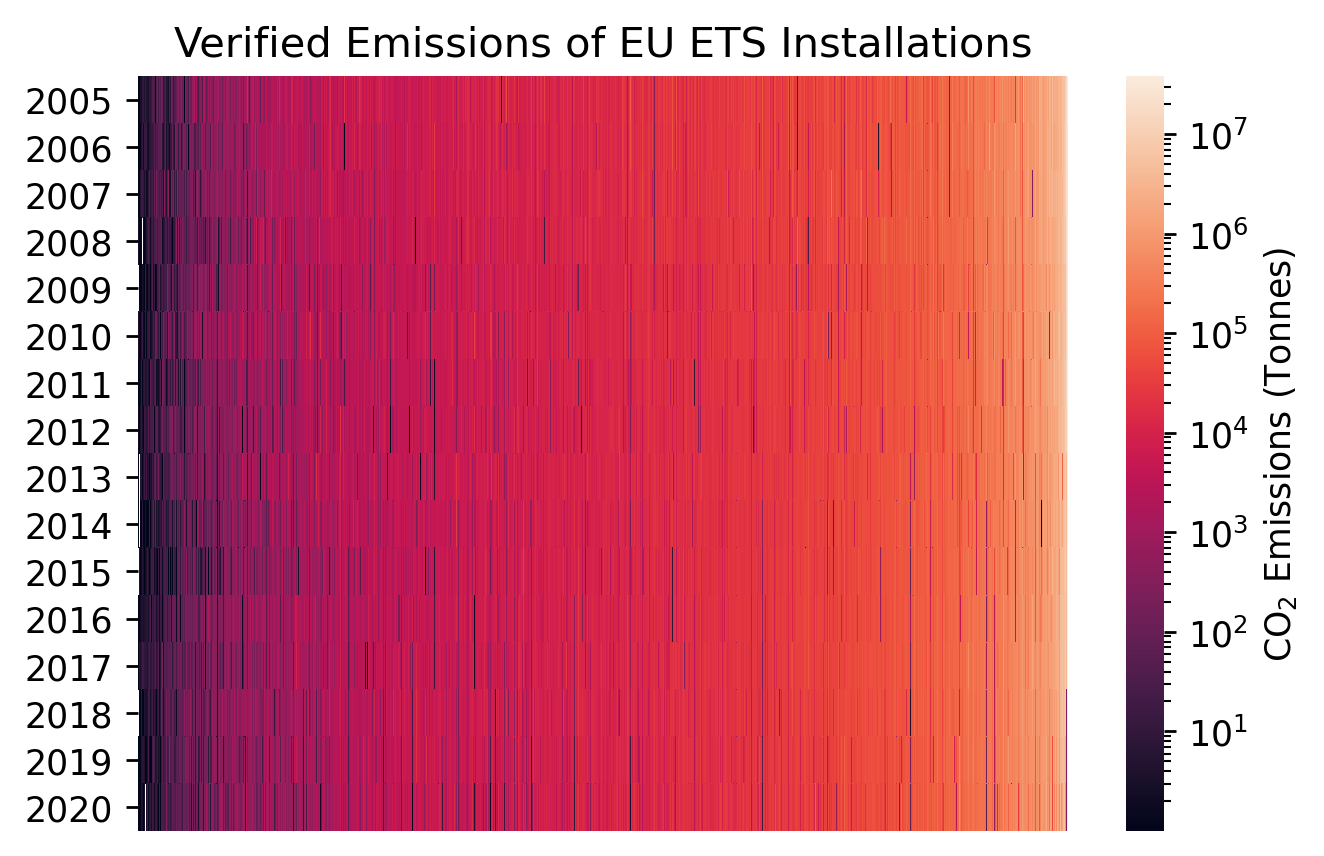

In [41]:
non_zero_offset = 0.0001

years_with_data = (df_installation_emissions.isnull().mean()<1).replace(False, np.nan).dropna().index

df_htmp = (df_installation_emissions.loc[df_installation_emissions.mean(axis=1).sort_values().index, years_with_data].replace(0, np.nan).dropna(how='all').fillna(0)+non_zero_offset).reset_index(drop=True)
df_mask = df_htmp==non_zero_offset

# Plotting
fig, ax = plt.subplots(dpi=250)

sns.heatmap(df_htmp.T, norm=LogNorm(), vmin=1, mask=df_mask.T, ax=ax, cbar_kws={'label': 'CO$_{2}$ Emissions (Tonnes)'})

ax.set_xticks([])
ax.set_title('Verified Emissions of EU ETS Installations')

Text(0.5, 0, 'Average Annual Change in CO$_{2}$ Emissions (Tonnes)')

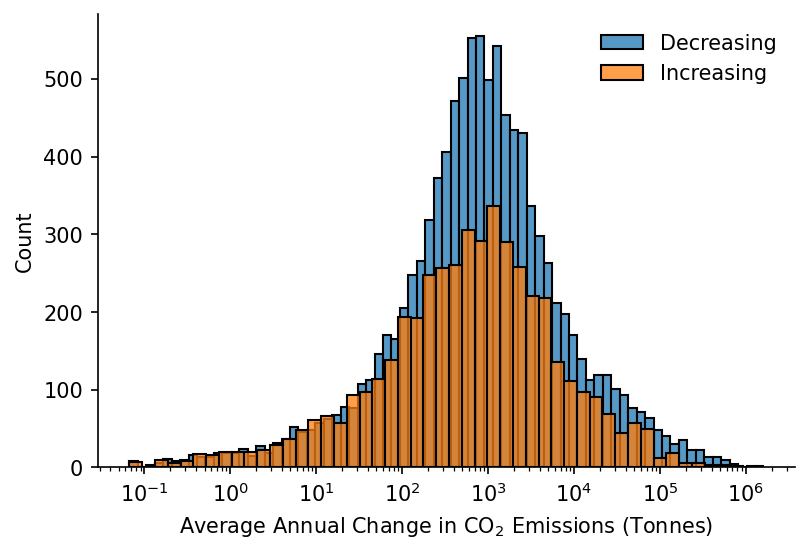

In [35]:
s_avg_annual_emissions_delta = df_installation_emissions.diff(axis=1).mean(axis=1)

# Plotting
fig, ax = plt.subplots(dpi=150)

sns.histplot(s_avg_annual_emissions_delta[s_avg_annual_emissions_delta<0].abs(), label='Decreasing', log_scale=True, color='C0', ax=ax)
sns.histplot(s_avg_annual_emissions_delta[s_avg_annual_emissions_delta>0], label='Increasing', log_scale=True, color='C1', ax=ax)

ax.legend(frameon=False)
hlp.hide_spines(ax)
ax.set_xlabel('Average Annual Change in CO$_{2}$ Emissions (Tonnes)')

<AxesSubplot:ylabel='Count'>

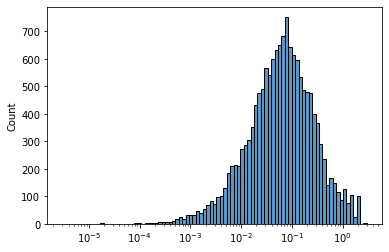

In [52]:
s_emissions_delta_to_abs_ratio = (s_avg_annual_emissions_delta.abs()/df_installation_emissions.mean(axis=1)).replace(0, np.nan).dropna()

sns.histplot(s_emissions_delta_to_abs_ratio, log_scale=True)

<br>

### Power Plant Matching

In [67]:
df_installations = installation_dfs['installations']

df_installations.head(3)

,installation_id,installation_name,permit_id,permit_entry_date,permit_expiration_Date,subsidiary_undertaking_name,parent_undertaking_name,EPRTR_id,initial_emissions_year,final_emissions_year,first_address_line,second_address_line,postcode,city,country,lat,lon,main_activity
account_id,,,,,,,,,,,,,,,,,,
93707,47,AGRANA Gmünd,ILE166,2005-01-26,NaN,NaN,NaN,NaN,2005,0,Conrathstrasse 7,NaN,3953,Gmünd,AT,NaN,NaN,20-Combustion of fuels
93708,50,AGRANA Aschach,ILE165,2005-10-18,NaN,NaN,NaN,20000.00442,2005,0,Raiffeisenweg 2-6,NaN,4082,Aschach,AT,NaN,NaN,20-Combustion of fuels
93709,51,AGRANA Tulln,ILE161,2005-07-01,NaN,NaN,NaN,20000.00320,2005,0,Josef-Reither-Strasse 21-23,NaN,3430,Tulln,AT,NaN,NaN,20-Combustion of fuels


In [85]:
num_big_emitters = 50

df_gb_combustion_installations = df_installations.query('country=="GB" & main_activity=="20-Combustion of fuels"')
biggest_emitters = df_installation_emissions.loc[df_gb_combustion_installations.index].mean(axis=1).nlargest(num_big_emitters).index

biggest_emitters

Int64Index([ 96842,  96923,  97778,  97052,  97220,  97445,  98253,  98251,
             97175,  97192,  97165,  97190,  96880,  98171,  97158,  97026,
             96979,  97054,  97034,  96827,  96906,  97061, 112433,  97047,
             97223,  97236,  98249,  98257,  97585,  97635,  98286,  96786,
             97781,  96908,  97059,  96965,  97636,  97443,  96911,  97057,
             97839,  97736,  97413,  97044,  96797, 116565,  96813,  96796,
             98045,  96999],
           dtype='int64', name='account_id')

In [106]:
df_gb_combustion_installations.loc[biggest_emitters].head()

,installation_id,installation_name,permit_id,permit_entry_date,permit_expiration_Date,subsidiary_undertaking_name,parent_undertaking_name,EPRTR_id,initial_emissions_year,final_emissions_year,first_address_line,second_address_line,postcode,city,country,lat,lon,main_activity
account_id,,,,,,,,,,,,,,,,,,
96842,381,Drax Power Station,UK-E-IN-11718,2005-05-18,NaN,NaN,NaN,NaN,2005,0,"DRAX POWER LIMITED,","DRAX POWER STATION, PO BOX 3",YO8 8PQ,"SELBY, NORTH YORKSHIRE",GB,NaN,NaN,20-Combustion of fuels
96923,593,Longannet Power Station,UK-S-IN-12326,2005-05-20,2016-07-01,NaN,NaN,NaN,2005,2016,Longannet Power Station,Spean Street,FK10 4AA,Alloa,GB,NaN,NaN,20-Combustion of fuels
97778,202,Cottam Power Station,UK-E-IN-13569,2005-05-17,2020-03-04,NaN,NaN,NaN,2005,2019,Settlements,"Cardinal Place, 2nd Floor",SW1E 5JL,London,GB,NaN,NaN,20-Combustion of fuels
97052,154,Ratcliffe on Soar power station,UK-E-IN-13306,2005-05-23,NaN,NaN,NaN,NaN,2005,0,Uniper UK Limited,"Westwood Way, Westwood Business Park",CV4 8LG,Coventry,GB,NaN,NaN,20-Combustion of fuels
97220,145,West Burton Power Station,UK-E-IN-11463,2005-05-18,NaN,NaN,NaN,NaN,2005,0,Settlements,"Cardinal Place, 2nd FLoor",SW1E 5JL,London,GB,NaN,NaN,20-Combustion of fuels


Text(0, 0.5, 'Drax CO$_{2}$ Emissions (Tonnes)')

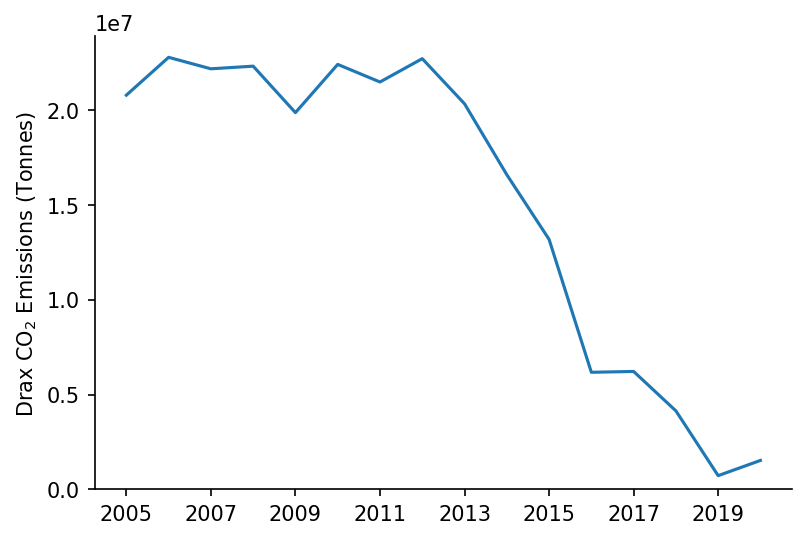

In [93]:
fig, ax = plt.subplots(dpi=150)

df_installation_emissions.loc[96842].plot(ax=ax)

hlp.hide_spines(ax)
ax.set_ylim(0)
ax.set_ylabel('Drax CO$_{2}$ Emissions (Tonnes)')

Text(0, 0.5, 'West Burton B CCGT\nCO$_{2}$ Emissions (Tonnes)')

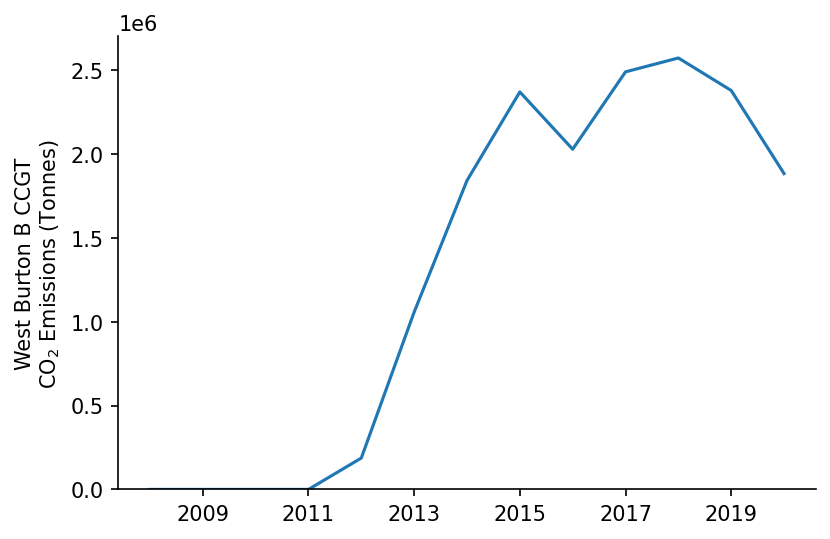

In [105]:
fig, ax = plt.subplots(dpi=150)

df_installation_emissions.loc[97223].plot(ax=ax)

hlp.hide_spines(ax)
ax.set_ylim(0)
ax.set_ylabel('West Burton B CCGT\nCO$_{2}$ Emissions (Tonnes)')